In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
infile = '../outputs/ppo2_rudder/Sonic_policy_cnn/%s/baselines/log.txt' % '2018-07-05T07-23-11'

In [3]:
import collections

def parse_log(infile):
    data = collections.defaultdict(list)
    with open(infile) as fo:
        for line in fo:
            line = line.strip()
            if '|' in line:
                s = line.strip('|').split('|')
                key, value = [ss.strip() for ss in s]
                value = float(value)
                data[key].append(value)

    df = pd.DataFrame(data) 
    return df

df = parse_log(infile)
df['hours_elapsed']=df['time_elapsed']/60/60
df['total_timesteps (M)']=df['total_timesteps']*1e-6
reward_scaling = 0.01
df['eprewmean100']/=reward_scaling
df['eprewmean']/=reward_scaling
df = df.set_index('total_timesteps (M)', drop=False)
df = df.sort_index()

df_time = df.set_index('hours_elapsed')
df_time = df_time.sort_index()

print(len(df))
df.tail(4)

515


,Relative_emavg_error...,approxkl,clipfrac,emavg_approxkl,eplenmean,eplenmean100,eprewmean,eprewmean100,explained_variance,fps,...,lr_scaling,nupdates,policy_entropy,policy_loss,serial_timesteps,time_elapsed,total_timesteps,vf_loss,hours_elapsed,total_timesteps (M)
total_timesteps (M),,,,,,,,,,,,,,,,,,,,,
8.288244,0.258,0.115071,0.247925,0.031719,433.0,428.0,1860.0,1740.0,0.961,39.0,...,0.01,1852.0,0.919039,-0.003325,1896448.0,92400.0,8288244.0,0.934459,25.666667,8.288244
8.293913,0.271,0.138755,0.294281,0.045744,434.0,434.0,1840.0,1770.0,0.972,65.0,...,0.01,1853.0,0.952075,-0.001953,1897472.0,92500.0,8293913.0,0.723000,25.694444,8.293913
8.298936,0.261,0.097442,0.207275,0.056633,422.0,411.0,1810.0,1720.0,0.954,44.0,...,0.01,1854.0,0.974385,0.001326,1898496.0,92700.0,8298936.0,1.099138,25.750000,8.298936
8.303665,0.245,0.038888,0.088684,0.058539,420.0,407.0,1790.0,1710.0,0.954,56.0,...,0.01,1855.0,0.889823,-0.001680,1899520.0,92800.0,8303665.0,1.028367,25.777778,8.303665


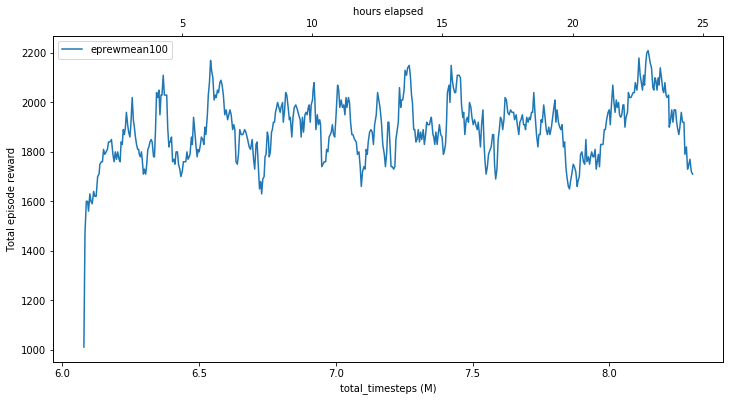

In [4]:
df[['eprewmean100']].plot(figsize=(12,6))
plt.ylabel('Total episode reward')
# plt.ylim(0,10000)

# Also plot hours on another x axis
def add_hours_topx(df):
    ax2 = plt.gca().twiny()
    hours = df['hours_elapsed']
    plt.xlim([hours.min(),hours.max()])
    plt.xlabel('hours elapsed')

add_hours_topx(df)
plt.show()

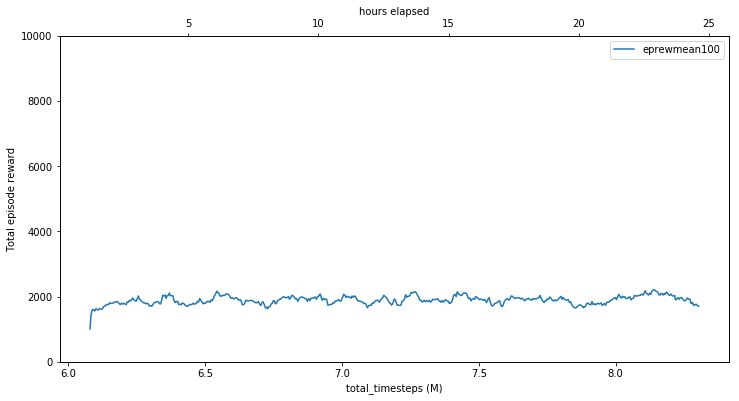

In [5]:
df[['eprewmean100']].plot(figsize=(12,6))
plt.ylabel('Total episode reward')
plt.ylim(0,10000)

add_hours_topx(df)
plt.show()

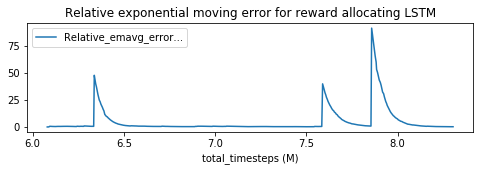

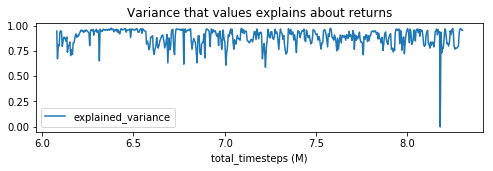

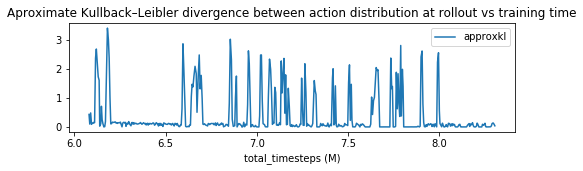

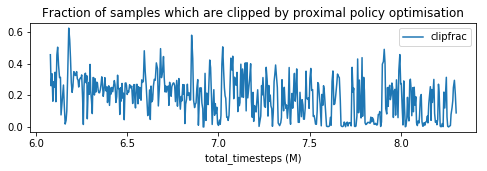

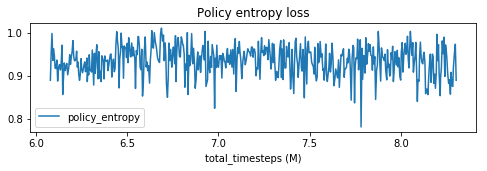

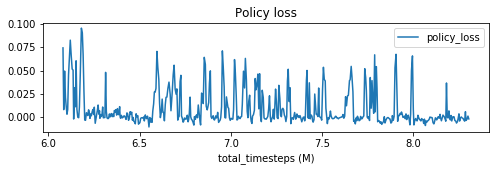

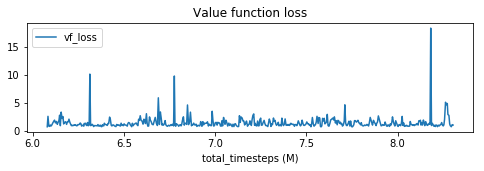

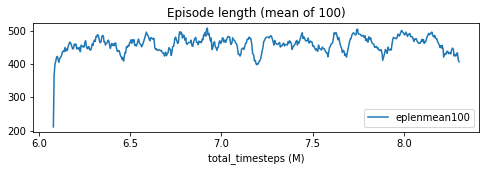

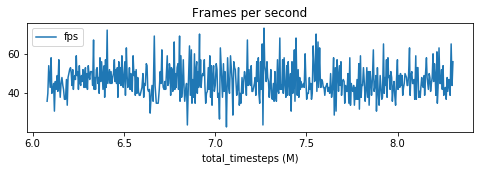

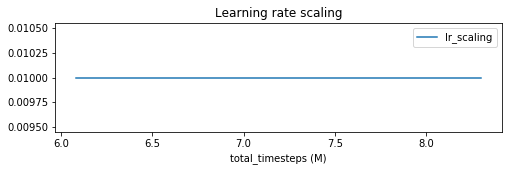

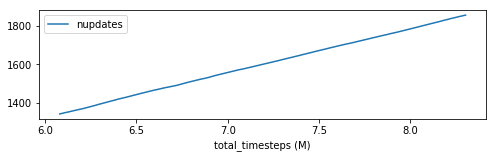

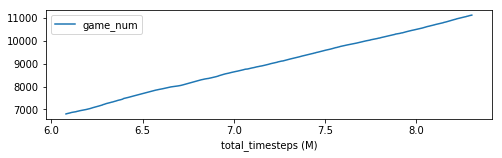

In [6]:
column_desc={
    'Relative_emavg_error...':'Relative exponential moving error for reward allocating LSTM',
    'explained_variance':'Variance that values explains about returns',
    'approxkl':'Aproximate Kullback–Leibler divergence between action distribution at rollout vs training time',
    'clipfrac':'Fraction of samples which are clipped by proximal policy optimisation',
    'vf_loss':'Value function loss',
    'policy_entropy':'Policy entropy loss',
    'policy_loss':'Policy loss',
    'eplenmean100':'Episode length (mean of 100)',
    'fps':'Frames per second',
    'lr_scaling':'Learning rate scaling'
    
}

for col in [
    'Relative_emavg_error...', # Relative_exponential moving_error_LSTM
    'explained_variance', # Explained variance in return values. Computes fraction of variance that ypred explains about y. (ypred=value, y=returns)
    
    # PPO diagnostics
    'approxkl', # kl between action distribution at rollout vs training time
#     'emavg_approxkl',
    'clipfrac', # fraction of samples which are clipped
    
    # PPO Losses
    'policy_entropy',
    'policy_loss',
    'vf_loss',
    
    # Env stats
    'eplenmean100',
    'fps',
    'lr_scaling',
    
    'nupdates',
    'game_num',
]:
    df[[col]].plot(figsize=(8, 2))
    if col in column_desc:
        plt.title(column_desc[col])
#     add_hours_topx(df)
    plt.show()

In [7]:
df['fps'].mean()

46.41747572815534